En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:

- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito

En este caso la target de nuestro modelo será **BAD**, el resto las consideraremos variables predictoras.

Que se espera que hagais:

- Análisis descriptivo de los datos (esto ayudará a realizar una mejor elección del modelo a usar)
- Tratamiento y limpieza de los datos
- Prueba y evaluación de diferentes modelos
- Breve explicación de los resultados, justificando la elección final del modelo (no me vale con que es el que mejor métrica tenía)
- Que disfruteis del ejercico :).

In [2]:
import LibreriasClasificadores


In [2]:
df1 = pd.read_csv(r'D:\bootcamp\dsb06rt\mod5-machine-learning-y-deep-learning\29_11_2023\credit_risk.csv')
df_no_nan=df1.dropna().copy()
dic_re={'DebtCon':1,'HomeImp':2}
dic_job={'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}
df_no_nan['JobEnum']=df_no_nan['JOB'].map(dic_job)
df_no_nan['ReasonEnum']=df_no_nan['REASON'].map(dic_re)

In [3]:
X=df_no_nan.drop(['BAD','JOB','REASON'],axis=1)
y=df_no_nan['BAD']


C:\Users\Danie\AppData\Local\Temp\ipykernel_17172\711118991.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df_no_nan.corr(), dtype=bool))
C:\Users\Danie\AppData\Local\Temp\ipykernel_17172\711118991.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_nan.corr(),


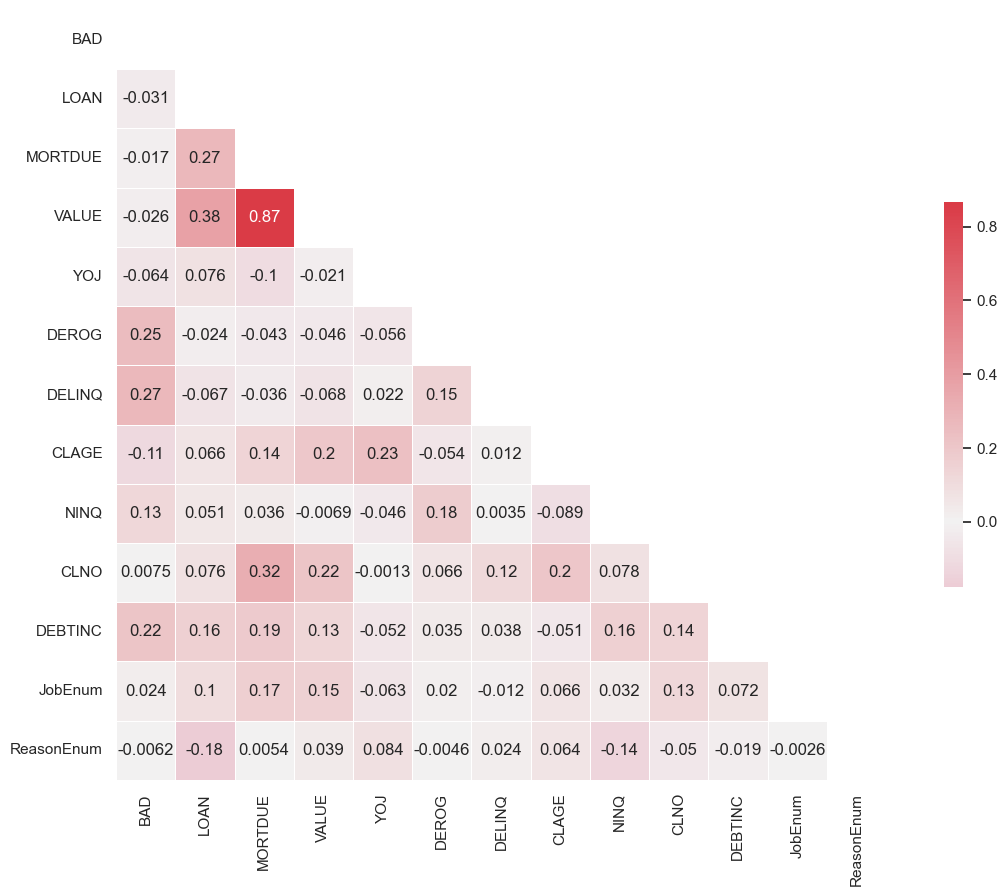

In [5]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df_no_nan.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_no_nan.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

C:\Users\Danie\AppData\Local\Temp\ipykernel_17172\2883284058.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df1.corr(), dtype=bool))
C:\Users\Danie\AppData\Local\Temp\ipykernel_17172\2883284058.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),


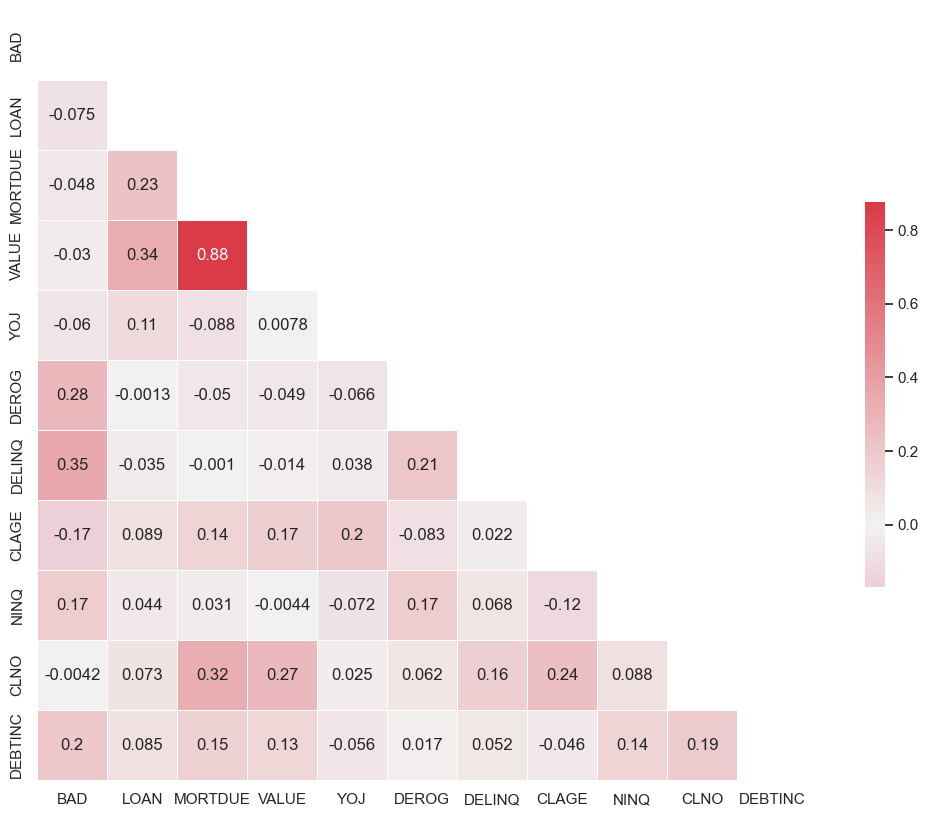

In [6]:

# buscando colinealidad con df con nan

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df1.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
print('------------------------------------------------------------------')
X=df_no_nan.drop(['BAD','JOB','REASON'],axis=1)
y=df_no_nan['BAD']
ArbolRandom(X,y,1,1)
print('------------------------------------------------------------------')
X=df_no_nan.drop(['BAD','JOB','REASON'],axis=1)
y=df_no_nan['BAD']
ArbolRandom(X,y,1,0)
print('------------------------------------------------------------------')
X=df_no_nan.drop(['BAD','JOB','REASON'],axis=1)
y=df_no_nan['BAD']
ArbolRandom(X,y,0,1)
print('------------------------------------------------------------------')
X=df_no_nan.drop(['BAD','JOB','REASON'],axis=1)
y=df_no_nan['BAD']
ArbolRandom(X,y,0,0)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.7448257930317213
Exactitud: 0.9583952451708767
Precisión: 0.9781591263650546
Sensibilidad: 0.7666666666666666
F1-score: 0.8366618126343527
ROC AUC: 0.7666666666666666
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.7282945736434108
Exactitud: 0.9583952451708767
Precisión: 0.9782945736434108
Sensibilidad: 0.75
F1-score: 0.8222398309561543
ROC AUC: 0.75
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.75390625
Exactitud: 0.9598811292719168
Precisión: 0.97890625
Sensibilidad: 0.775
F1-score: 0.8440645676183611
ROC AUC: 0.775
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.718625608137992
Exactitud: 0.9569093610698366
Precisión: 0.9775541795665634
S

In [8]:
ArbolRandom(X,y,1,1)

MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.735747663551402
Exactitud: 0.9569093610698366
Precisión: 0.9774143302180686
Sensibilidad: 0.7583333333333333
F1-score: 0.829105555798783
ROC AUC: 0.7583333333333333


SOLO TRATANDO LAS CATEGORICAS HEMOS OBTENIDO UN F1 DE 0,85 VAMOS A COMPROBAR QUE COLUMNAS TIENEN MAS PESO

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
scaler = MinMaxScaler()
scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, y_train) 
yhat = model.predict(X_test)

In [10]:
model.feature_importances_

array([0.08616663, 0.08708142, 0.10525728, 0.05875637, 0.04461991,
       0.08359965, 0.1072375 , 0.04445184, 0.08456368, 0.24064599,
       0.04527357, 0.01234617])

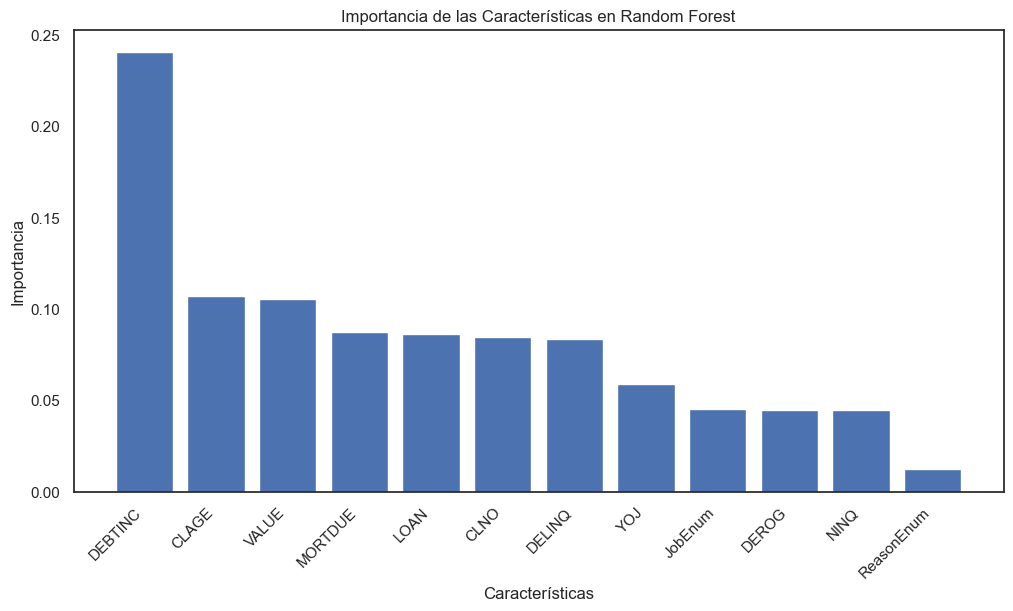

In [11]:
feature_importances = model.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1-score en Conjunto de Entrenamiento: {f1_train}')
print(f'F1-score en Conjunto de Prueba: {f1_test}')

F1-score en Conjunto de Entrenamiento: 1.0
F1-score en Conjunto de Prueba: 0.8513187410781048


Comprobamos que el modelo esta sobre entrenado tomaremos medidas para intentar evitarlo

In [13]:
model_regularized = RandomForestClassifier(max_depth=11)
model_regularized.fit(X_train, y_train)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 11: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=11: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 11: 0.8154922864668255
F1-score en Conjunto de Prueba con max_depth=11: 0.8213906581740977


In [17]:
model_regularized = RandomForestClassifier(max_depth=10)
model_regularized.fit(X_train, y_train)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 10: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=10: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 10: 0.7888281617843921
F1-score en Conjunto de Prueba con max_depth=10: 0.8213906581740977


In [18]:
model_cross_val = RandomForestClassifier()
f1_scores_cross_val = cross_val_score(model_cross_val, X_train, y_train, scoring='f1_macro', cv=5)
print(f'F1-score promedio en validación cruzada: {f1_scores_cross_val.mean()}')

F1-score promedio en validación cruzada: 0.7627418366748211


In [19]:

model_weighted = RandomForestClassifier(class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_train_pred_weighted = model_weighted.predict(X_train)
y_test_pred_weighted = model_weighted.predict(X_test)
f1_train_weighted = f1_score(y_train, y_train_pred_weighted, average='macro')
f1_test_weighted = f1_score(y_test, y_test_pred_weighted, average='macro')

print(f'F1-score en Conjunto de Entrenamiento (Con Ponderación): {f1_train_weighted}')
print(f'F1-score en Conjunto de Prueba (Con Ponderación): {f1_test_weighted}')

F1-score en Conjunto de Entrenamiento (Con Ponderación): 1.0
F1-score en Conjunto de Prueba (Con Ponderación): 0.8213906581740977


Ahora queremos trabajar nuestros nan para hacer estimaciones y comprobar si:

1-> El modelo tiene un buen funcionamiento para todo el conjunto con estimaciones

2-> El modelo sin los nan al tratarlos fuera del modelo y pasarlos por el modelo que acierto tiene

In [76]:
df1[df1['BAD']==0].sort_values('DEBTINC',ascending=True).head(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1780,0,12100,NaN,72731.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.720295
2088,0,13200,NaN,69139.0,NaN,NaN,0.0,1.0,0.0,NaN,0.0,1.0,1.565931
2633,0,15100,NaN,65961.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.603508


Vamos a ver a los que se supone que tienen el maximo y el minimo de debtinc

In [82]:
df_debtinc=df1[['BAD','DEBTINC']]
df_debtinc[df_debtinc['BAD']==0].describe()

,BAD,DEBTINC
count,4771.0,4290.000000
mean,0.0,33.253129
std,0.0,6.947482
min,0.0,0.720295
25%,0.0,28.905127
50%,0.0,34.541671
75%,0.0,38.739077
max,0.0,45.569843


In [84]:
si_deb_max=45.569843
si_deb_min=0.720295
print("Se te acepta con un debtinc maximo de : ",si_deb_max)
print("Se te acepta con un debtinc minimo de : ",si_deb_min)

Se te acepta con un debtinc maximo de :  45.569843
Se te acepta con un debtinc minimo de :  0.720295


In [39]:
df2=df1.copy()

In [54]:
df2['INCOME_ESTIMATE'] = (df2['LOAN'] + df2['MORTDUE']) / (df2['DEBTINC'] / 100)



In [55]:
df2.drop('INCOME_ESTIMATE',inplace=True,axis=1)

In [ ]:
df2.sort_values('INCOME_ESTIMATE')

In [44]:
df2[(df2['BAD']==1) & (df2['INCOME_ESTIMATE']>0)].sort_values('INCOME_ESTIMATE')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,INCOME_ESTIMATE
36,1,2900,7750.0,67996.0,HomeImp,Other,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348,2.941067e+04
4423,1,23000,58577.0,69327.0,NaN,Other,4.0,0.0,2.0,110.414480,2.0,33.0,133.528270,6.109343e+04
4473,1,23300,103783.0,132612.0,DebtCon,Sales,1.0,0.0,NaN,120.347967,0.0,19.0,203.312149,6.250635e+04
1072,1,9700,32660.0,54536.0,DebtCon,Office,0.0,0.0,0.0,156.482106,0.0,13.0,67.324904,6.291877e+04
216,1,5200,40564.0,39527.0,HomeImp,Other,0.0,0.0,0.0,157.771036,1.0,13.0,72.670433,6.297472e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,1,26800,89146.0,128923.0,DebtCon,Mgr,7.0,2.0,1.0,114.461955,7.0,16.0,2.830297,4.096602e+06
5004,1,26500,61223.0,92255.0,DebtCon,Other,2.0,0.0,1.0,214.032539,0.0,17.0,1.855540,4.727627e+06
57,1,3200,23159.0,NaN,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499,5.025556e+06
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570,9.170519e+06


In [45]:
df2[(df2['BAD']==1) & (df2['INCOME_ESTIMATE']>0)].sort_values('INCOME_ESTIMATE',ascending=False)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,INCOME_ESTIMATE
5187,1,27900,90694.0,121543.0,DebtCon,Mgr,5.0,2.0,1.0,107.046251,8.0,15.0,0.838118,1.415004e+07
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570,9.170519e+06
57,1,3200,23159.0,NaN,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499,5.025556e+06
5004,1,26500,61223.0,92255.0,DebtCon,Other,2.0,0.0,1.0,214.032539,0.0,17.0,1.855540,4.727627e+06
5039,1,26800,89146.0,128923.0,DebtCon,Mgr,7.0,2.0,1.0,114.461955,7.0,16.0,2.830297,4.096602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1,5200,40564.0,39527.0,HomeImp,Other,0.0,0.0,0.0,157.771036,1.0,13.0,72.670433,6.297472e+04
1072,1,9700,32660.0,54536.0,DebtCon,Office,0.0,0.0,0.0,156.482106,0.0,13.0,67.324904,6.291877e+04
4473,1,23300,103783.0,132612.0,DebtCon,Sales,1.0,0.0,NaN,120.347967,0.0,19.0,203.312149,6.250635e+04
4423,1,23000,58577.0,69327.0,NaN,Other,4.0,0.0,2.0,110.414480,2.0,33.0,133.528270,6.109343e+04


In [46]:
df2.shape

(5960, 14)

In [47]:
df2.dropna(thresh=4, inplace=True)

In [48]:
df2.shape

(5947, 14)

In [57]:
df2.isna().sum()

BAD           0
LOAN          0
MORTDUE     505
VALUE       104
REASON      239
JOB         266
YOJ         502
DEROG       695
DELINQ      567
CLAGE       295
NINQ        497
CLNO        209
DEBTINC    1260
dtype: int64

Vamos a probar el H2o en 3 ocasiones con el ejercicio sin nan con el ejercicio con nan y con los nan tratados

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [41]:
dfh2o=df1.copy()

In [42]:
dfh2o.BAD.astype('category')

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]

In [44]:
X=df_no_nan.drop('BAD', axis=1)
y=df_no_nan.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [45]:
X_train.shape,X_test.shape

((2691, 14), (673, 14))

In [47]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.391-b13, mixed mode, sharing)
  Starting server from C:\Users\Danie\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Danie\AppData\Local\Temp\tmprhfbrzox
  JVM stdout: C:\Users\Danie\AppData\Local\Temp\tmprhfbrzox\h2o_Danie_started_from_python.out
  JVM stderr: C:\Users\Danie\AppData\Local\Temp\tmprhfbrzox\h2o_Danie_started_from_python.err


C:\Users\Danie\anaconda3\Lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_Danie_re7eiv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [48]:
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
h2o.shutdown() #para cerrar sesion

H2O session _sid_81cd closed.


C:\Users\Danie\AppData\Local\Temp\ipykernel_5396\3090852623.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown() #para cerrar sesion


In [27]:
train_h2o.columns,test_h2o.columns

(['LOAN',
  'MORTDUE',
  'VALUE',
  'YOJ',
  'DEROG',
  'DELINQ',
  'CLAGE',
  'NINQ',
  'CLNO',
  'DEBTINC',
  'JobEnum',
  'ReasonEnum',
  'BAD'],
 ['LOAN',
  'MORTDUE',
  'VALUE',
  'YOJ',
  'DEROG',
  'DELINQ',
  'CLAGE',
  'NINQ',
  'CLNO',
  'DEBTINC',
  'JobEnum',
  'ReasonEnum',
  'BAD'])

In [49]:
X=[c for c in train_h2o.columns if c!='BAD']

y='BAD'

In [50]:
X

['LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC',
 'JobEnum',
 'ReasonEnum']

In [51]:
y

'BAD'

In [56]:
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

In [57]:
# inicia auto-machine-learning
automl = H2OAutoML(max_models=20,
                   seed=42,
                   max_runtime_secs=300,
                   sort_metric='F1')

In [58]:
# entrena
automl.train(x=X, 
            y=y,
            training_frame=train_h2o)

AutoML progress: |
16:29:29.274: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_2_20231202_162929


Status of Neuron Layers: predicting BAD, 2-class classification, bernoulli distribution, CrossEntropy loss, 472 weights/biases, 11,3 KB, 30.757 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -------------------
    1        22       Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.09279750072481957    0.28389406204223633    0.0         0.01647603570229628    0.24933242797851562  0.5196353136709233    0.15133726596832275
    3        10       Rectifier  0.0        0.0   0.0   0.0019416889405692928  0.0017682570032775402  0.0         0.007522768471390009   0.3289916515350342   0.9840464620864177    0.07430225610733032
    4        10       Rectifier  0.0        0.0   0.0   0.0056047837069490925  0.013786327093839645   0.0         -0.009397780443541705  0.3123745918273926   1.033802927611504     0.09367209672927856
    5        2        Softmax               0.0   0.0   0.0013310292328242213  0.0009797937236726284  0.0         -0.38736594570800664   1.468954086303711    0.000192822820983235  0.06790533661842346

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.05712102088620051
RMSE: 0.23900004369497616
LogLoss: 0.20957977476803874
Mean Per-Class Error: 0.2607124643002856
AUC: 0.8518869849041207
AUCPR: 0.5510185990762824
Gini: 0.7037739698082415

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18879588681371315
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      2327  124  0.0506   (124.0/2451.0)
1      113   127  0.4708   (113.0/240.0)
Total  2440  251  0.0881   (237.0/2691.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.188796     0.517312  162
max f2                       0.0876882    0.561724  246
max f0point5                 0.521623     0.597426  63
max accuracy                 0.566187     0.930881  56
max precision                0.99994      1         0
max recall                   0.00663244   1         387
max specificity              0.99994      1         0
max absolute_mcc             0.266268     0.477965  123
max min_per_class_accuracy   0.0666721    0.771522  272
max mean_per_class_accuracy  0.0876882    0.776938  246
max tns                      0.99994      2451      0
max fns                      0.99994      237       0
max fps                      0.00125198   2451      399
max tps                      0.00663244   240       387
max tnr                      0.99994      1         0
max fnr                      0.99994      0.9875    0
max fpr                      0.00125198   1         399
max tpr                      0.00663244   1         387

Gains/Lift Table: Avg response rate:  8,92 %, avg score:  7,88 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100334                   0.801738           11.2125    11.2125            1                0.940851    1                           0.940851            0.1125          0.1125

In [59]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,f1,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_2_20231202_162929,0.434938,0.797505,0.240189,0.436395,0.286429,0.255898,0.0654836
GLM_1_AutoML_2_20231202_162929,0.452675,0.785333,0.239314,0.441632,0.298577,0.253362,0.0641923
GBM_1_AutoML_2_20231202_162929,0.576842,0.894424,0.189634,0.613425,0.234575,0.230229,0.0530055
DeepLearning_grid_1_AutoML_2_20231202_162929_model_1,0.577215,0.846441,0.208567,0.596069,0.270864,0.231148,0.0534292
GBM_grid_1_AutoML_2_20231202_162929_model_3,0.648889,0.905807,0.217043,0.713395,0.208889,0.244965,0.0600079
GBM_grid_1_AutoML_2_20231202_162929_model_1,0.662037,0.894474,0.172324,0.707006,0.212079,0.212438,0.0451297
GBM_2_AutoML_2_20231202_162929,0.693587,0.91063,0.163404,0.740667,0.202973,0.207088,0.0428856
GBM_5_AutoML_2_20231202_162929,0.694253,0.907733,0.167632,0.730153,0.194393,0.209943,0.0440761
GBM_4_AutoML_2_20231202_162929,0.698198,0.914196,0.165782,0.753359,0.187079,0.207436,0.0430299
GBM_grid_1_AutoML_2_20231202_162929_model_2,0.70852,0.922901,0.159619,0.759053,0.180625,0.20442,0.0417875


In [62]:
# prediciones del lider

y_pred=automl.leader.predict(test_h2o)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [65]:
test_h2o.shape

(673, 15)

In [64]:
y_pred.shape

(673, 3)

In [66]:
automl.leader.download_model()

'D:\\bootcamp\\ejercicios\\DeepLearning_1_AutoML_2_20231202_162929'

In [ ]:
#para cargar el modelo
#modelo = h2o.load_model('DeepLearning_1_AutoML_2_20231202_162929')

EL maximo f1 ha sido 0.70852 con DeepLearning ahora vamos a probar a pasarle el df sin los nan

In [21]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.391-b13, mixed mode, sharing)
  Starting server from C:\Users\Danie\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Danie\AppData\Local\Temp\tmpc6ti6lfc
  JVM stdout: C:\Users\Danie\AppData\Local\Temp\tmpc6ti6lfc\h2o_Danie_started_from_python.out
  JVM stderr: C:\Users\Danie\AppData\Local\Temp\tmpc6ti6lfc\h2o_Danie_started_from_python.err


C:\Users\Danie\anaconda3\Lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_Danie_slvqhm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [34]:
h2o.cluster().shutdown() #para cerrar sesion

In [22]:
dfNoNan=df1.dropna().copy()

In [24]:
dfNoNan.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894


In [25]:
dfNoNan.BAD.astype('category')
X=dfNoNan.drop('BAD', axis=1)
y=dfNoNan.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [26]:
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [27]:
X=[c for c in train_h2o.columns if c!='BAD']

y='BAD'

In [28]:
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

In [29]:
# inicia auto-machine-learning
automl = H2OAutoML(max_models=20,
                   seed=42,
                   max_runtime_secs=300,
                   sort_metric='F1')

In [30]:
# entrena
automl.train(x=X, 
            y=y,
            training_frame=train_h2o)

AutoML progress: |
13:15:28.893: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20231203_131528


Status of Neuron Layers: predicting BAD, 2-class classification, bernoulli distribution, CrossEntropy loss, 452 weights/biases, 10,8 KB, 30.757 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ---------------------  -------------------
    1        20       Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.10196561054923223    0.2986574172973633     0.0         0.010629450408741832   0.25277721881866455  0.5181143140779126     0.1606084108352661
    3        10       Rectifier  0.0        0.0   0.0   0.0012213076039915905  0.0006257728673517704  0.0         0.016877740779891612   0.3135490417480469   1.0351552272766011     0.13876402378082275
    4        10       Rectifier  0.0        0.0   0.0   0.12291459097032202    0.3015272617340088     0.0         -0.013887944312300534  0.3133118152618408   1.0270161683593846     0.09780323505401611
    5        2        Softmax               0.0   0.0   0.10175893726700451    0.29874420166015625    0.0         -0.38550361171364783   1.4556360244750977   0.0040061985271344636  0.07452920079231262

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.06041240315863974
RMSE: 0.2457893471219608
LogLoss: 0.2187576743875672
Mean Per-Class Error: 0.2719451244390045
AUC: 0.8506774445804433
AUCPR: 0.5211578780441017
Gini: 0.7013548891608865

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14258459019230466
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      2323  128  0.0522   (128.0/2451.0)
1      118   122  0.4917   (118.0/240.0)
Total  2441  250  0.0914   (246.0/2691.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.142585     0.497959  160
max f2                       0.0928601    0.54434   209
max f0point5                 0.260274     0.575843  93
max accuracy                 0.320266     0.927908  76
max precision                0.999692     1         0
max recall                   0.00600055   1         392
max specificity              0.999692     1         0
max absolute_mcc             0.260274     0.455131  93
max min_per_class_accuracy   0.0531883    0.754167  271
max mean_per_class_accuracy  0.0733211    0.761539  237
max tns                      0.999692     2451      0
max fns                      0.999692     236       0
max fps                      0.00315165   2451      399
max tps                      0.00600055   240       392
max tnr                      0.999692     1         0
max fnr                      0.999692     0.983333  0
max fpr                      0.00315165   1         399
max tpr                      0.00600055   1         392

Gains/Lift Table: Avg response rate:  8,92 %, avg score:  6,55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100334                   0.797932           11.2125    11.2125            1                0.912777    1                           0.912777            0.1125          0.11

In [31]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,f1,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_1_20231203_131528,0.423983,0.790594,0.244262,0.420969,0.319862,0.258569,0.0668581
GLM_1_AutoML_1_20231203_131528,0.452555,0.785452,0.239429,0.442261,0.279202,0.253319,0.0641705
DeepLearning_grid_1_AutoML_1_20231203_131528_model_1,0.575835,0.846675,0.206264,0.613797,0.274215,0.227202,0.0516209
GBM_grid_1_AutoML_1_20231203_131528_model_3,0.580517,0.885893,0.215981,0.639826,0.219701,0.242373,0.0587448
GBM_1_AutoML_1_20231203_131528,0.593103,0.903658,0.182618,0.642279,0.244714,0.225642,0.0509141
GBM_5_AutoML_1_20231203_131528,0.647619,0.896736,0.175637,0.70275,0.225643,0.214181,0.0458737
GBM_grid_1_AutoML_1_20231203_131528_model_1,0.683841,0.900694,0.169561,0.710926,0.204197,0.210076,0.0441321
GBM_4_AutoML_1_20231203_131528,0.68709,0.916411,0.163675,0.748227,0.185157,0.208437,0.0434462
XRT_1_AutoML_1_20231203_131528,0.690909,0.920558,0.167822,0.770411,0.160886,0.207301,0.0429738
GBM_grid_1_AutoML_1_20231203_131528_model_5,0.696581,0.923938,0.160593,0.76814,0.173677,0.204322,0.0417473


In [66]:
df2=df1.copy()

In [67]:
dic_re={'DebtCon':1,'HomeImp':2}
dic_job={'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}
df2['JobEnum']=df2['JOB'].map(dic_job)
df2['ReasonEnum']=df2['REASON'].map(dic_re)

In [78]:
df2.

,BAD,LOAN,MORTDUE,VALUE,REASON,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum
57,1,3200,23159.0,NaN,HomeImp,NaN,2.0,117.805748,0.0,9.0,0.524499,4.0,2.0
1780,0,12100,NaN,72731.0,NaN,0.0,0.0,NaN,0.0,0.0,0.720295,NaN,NaN
5187,1,27900,90694.0,121543.0,DebtCon,2.0,1.0,107.046251,8.0,15.0,0.838118,4.0,1.0
5642,1,39300,NaN,62158.0,DebtCon,0.0,0.0,238.874129,1.0,14.0,1.028931,1.0,1.0
2088,0,13200,NaN,69139.0,NaN,1.0,0.0,NaN,0.0,1.0,1.565931,NaN,NaN
2633,0,15100,NaN,65961.0,NaN,0.0,0.0,NaN,0.0,0.0,1.603508,NaN,NaN
5004,1,26500,61223.0,92255.0,DebtCon,0.0,1.0,214.032539,0.0,17.0,1.855540,1.0,1.0
5468,1,32900,NaN,55657.0,NaN,1.0,3.0,210.012265,10.0,15.0,1.909225,NaN,NaN
2617,0,15000,NaN,68020.0,NaN,0.0,0.0,NaN,0.0,0.0,1.920694,NaN,NaN
1855,0,12400,NaN,69350.0,NaN,0.0,0.0,NaN,0.0,0.0,2.365195,NaN,NaN


In [69]:
df2.sort_values('DEBTINC',inplace=True)

In [71]:
df2.shape

(5960, 15)

In [73]:
df2.drop(['JOB','YOJ'],inplace=True, axis=1)

In [74]:
df2.shape


(5960, 13)

In [77]:
df2.isna().sum()

BAD              0
LOAN             0
MORTDUE        518
VALUE          112
REASON         252
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
JobEnum        279
ReasonEnum     252
dtype: int64

In [75]:
df2.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'JobEnum', 'ReasonEnum'],
      dtype='object')

In [93]:
df2.REASON.value_counts()

DebtCon    3813
HomeImp    1723
Name: REASON, dtype: int64

In [96]:
reason={'DebtCon':1,'HomeImp':2}
df2['ReasonNum']=df2['REASON'].map(reason)
df2.drop('REASON',axis=1,inplace=True)

In [79]:
df2 = df2.sort_values(by=['BAD','DEBTINC'])

In [81]:
df2 = df2.reset_index(drop=True)

In [97]:
df2

,BAD,LOAN,MORTDUE,VALUE,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum,ReasonNum
11,0,22500,48405.0,86989.0,0.0,0.0,94.928088,1.0,9.0,4.029951,1.0,1.0,1
12,0,21800,48139.0,80114.0,0.0,0.0,111.998631,1.0,9.0,4.142704,1.0,1.0,1
13,0,19500,52080.0,89913.0,0.0,0.0,110.760307,0.0,9.0,4.337283,1.0,1.0,1
14,0,21300,55140.0,81692.0,0.0,0.0,109.900686,1.0,10.0,4.384983,1.0,1.0,1
15,0,22000,48041.0,88433.0,0.0,0.0,96.336435,0.0,10.0,5.226674,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,1,60000,86573.0,159920.0,0.0,5.0,332.733333,3.0,22.0,203.312149,2.0,1.0,1
5956,1,63300,202000.0,281000.0,0.0,0.0,99.433333,2.0,21.0,203.312149,2.0,1.0,1
5957,1,72300,120103.0,85000.0,0.0,0.0,117.166667,9.0,23.0,203.312149,1.0,1.0,1
5958,1,76500,38206.0,90000.0,0.0,0.0,134.900000,0.0,26.0,203.312149,1.0,1.0,1


In [83]:
df2.isna().sum()

BAD              0
LOAN             0
MORTDUE        518
VALUE          112
REASON         252
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
JobEnum        279
ReasonEnum     252
dtype: int64

In [85]:
columnas_a_evaluar = ['MORTDUE', 'VALUE', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


for index, row in df2.iterrows():
    for columna in columnas_a_evaluar:
        # Encuentra las filas más cercanas por arriba y por debajo
        above = df2.loc[index - 1][columna] if index - 1 >= 0 else None
        below = df2.loc[index + 1][columna] if index + 1 < len(df2) else None

        # Calcula la media de las filas más cercanas
        mean_neighbor = pd.Series([above, below]).mean(skipna=True)

        # Rellena el valor nulo con la media calculada
        df2.at[index, columna] = row[columna] if pd.notnull(row[columna]) else mean_neighbor

In [86]:
df2.isna().sum()

BAD             0
LOAN            0
MORTDUE        10
VALUE           0
REASON        252
DEROG           0
DELINQ          0
CLAGE          10
NINQ            0
CLNO            0
DEBTINC         0
JobEnum       279
ReasonEnum    252
dtype: int64

In [87]:
df2.REASON.value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [88]:
df2.dropna(inplace=True)

In [89]:
df2.isna().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
DEROG         0
DELINQ        0
CLAGE         0
NINQ          0
CLNO          0
DEBTINC       0
JobEnum       0
ReasonEnum    0
dtype: int64

In [90]:
df2.shape

(5536, 13)

In [98]:
X=df2.drop('BAD', axis=1)
y=df2.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [102]:
model_regularized = RandomForestClassifier(max_depth=3)
model_regularized.fit(X_train, y_train)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 11: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=11: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 11: 0.8993549407301993
F1-score en Conjunto de Prueba con max_depth=11: 0.9087542693795284


In [4]:
def ArbolRandom(X,y,normalizar,stratify):
    if(normalizar)and(stratify):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
        scaler = MinMaxScaler()
        scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
        X_train_scaler = scaler.transform(X_train)
        X_test_scaler = scaler.transform(X_test)
        model = RandomForestClassifier()
        model.fit(X_train, y_train) 
        yhat = model.predict(X_test)
        print(f'MODELO NORMALIZADO CON STRATIFY EN Y')
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Exactitud:"    , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:", roc_auc_score(y_test, yhat))
#         confusion_matrix(y_test, yhat, labels = [0, 1])
     
#         plt.figure(figsize=(10,10))
#         sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
#         plt.xlabel('Predicción')
#         plt.ylabel('Verdad');
#         plt.title(f'MODELO NORMALIZADO CON STRATIFY EN Y')
    elif(normalizar)and not(stratify):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
        scaler = MinMaxScaler()
        scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
        X_train_scaler = scaler.transform(X_train)
        X_test_scaler = scaler.transform(X_test)
        model = RandomForestClassifier()
        model.fit(X_train, y_train) 
        yhat = model.predict(X_test)
        print(f'MODELO NORMALIZADO SIN STRATIFY EN Y')
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Exactitud:"    , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:", roc_auc_score(y_test, yhat))
        # confusion_matrix(y_test, yhat, labels = [0, 1])
        # plt.figure(figsize=(10,10))
        # sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
        # plt.xlabel('Predicción')
        # plt.ylabel('Verdad');
        # plt.title(f'MODELO NORMALIZADO SIN STRATIFY EN Y')
    elif(stratify)and not(normalizar):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
        model = RandomForestClassifier()
        model.fit(X_train, y_train) 
        yhat = model.predict(X_test)
        print(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Exactitud:"    , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:", roc_auc_score(y_test, yhat))
        # confusion_matrix(y_test, yhat, labels = [0, 1])
        # plt.figure(figsize=(10,10))
        # sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
        # plt.xlabel('Predicción')
        # plt.ylabel('Verdad');
        # plt.title(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
    else:
         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
         model = RandomForestClassifier()
         model.fit(X_train, y_train) 
         yhat = model.predict(X_test)
         print(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
         print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
         print("Exactitud:"    , accuracy_score(y_test, yhat))
         print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
         print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
         print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
         print("ROC AUC:", roc_auc_score(y_test, yhat))        